<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/mproj_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
source1 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data.csv"
source2 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data2.csv"
source3 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data3.csv"
source4 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data4.csv"
source5 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data5.csv"
source6 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data6.csv"
df1 = pd.read_csv(source1)
df2 = pd.read_csv(source2)
df3 = pd.read_csv(source3)
df4 = pd.read_csv(source4)
df5 = pd.read_csv(source5)
df6 = pd.read_csv(source6)
df = pd.concat([df1,df2,df3,df4,df5,df6])
df = df[df.columns[1:]] # remove 'Unnamed: 0' column
df.years_total = df.years_total.apply(lambda x: x.split()[0])
df = df.rename(columns={'years_total':'days_total'})
df.days_total = df.days_total.astype(int)

#df = df[df.days_total >  500]
                   
df.head()

,days_total,climbs_total,pitches_total,route_mean,route_max,boulder_mean,boulder_max,danger_factor,solos,hardest_solo,trad_count,sport_count,locations,success,quarter_max1,quarter_max2,quarter_max3,quarter_max4
0,103,10,10,9.690,11.0,NaN,NaN,0.0,0,NaN,2,10,5,3,11.0,NaN,NaN,NaN
1,1725,19,29,7.675,10.3,1.763636,8.8,0.0,0,NaN,5,3,10,0,10.3,NaN,NaN,NaN
2,15,4,4,9.650,10.1,NaN,NaN,0.0,0,NaN,0,4,1,0,10.1,NaN,NaN,NaN
3,10,5,5,9.660,10.0,NaN,NaN,0.0,0,NaN,1,5,3,1,10.0,NaN,NaN,NaN
4,11,4,4,7.375,7.5,NaN,NaN,0.0,0,NaN,0,4,2,0,7.5,NaN,NaN,NaN


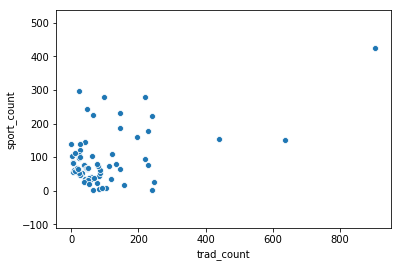

In [3]:
#sb.scatterplot('solos','danger_factor',data=df);
#long = df[df.days_total > 1000]
improving = df[(df.quarter_max4 - df.quarter_max1) > 0]
sb.scatterplot('trad_count','sport_count',data=improving)
plt.axis('equal');

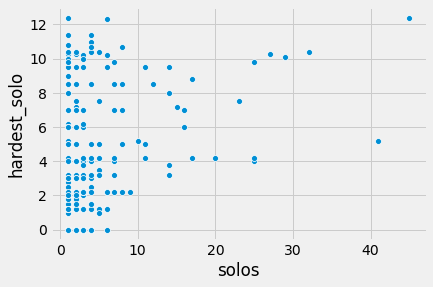

In [4]:
# Comparable to below, 
plt.style.use('fivethirtyeight')
sb.scatterplot('solos','hardest_solo',data=df);

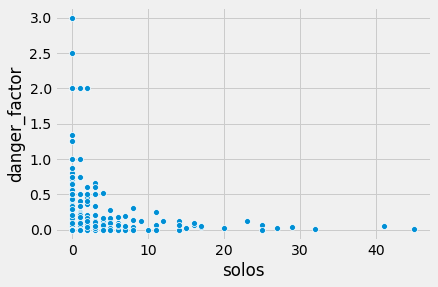

In [5]:
# interesting, fewer soloists tend to climb dangerous things (even when roped in)
sb.scatterplot('solos','danger_factor',data=df);

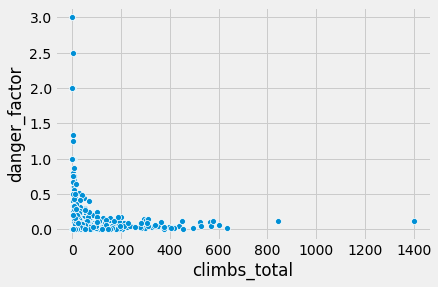

In [6]:
sb.scatterplot('climbs_total','danger_factor',data=df);

0.3360906400742882


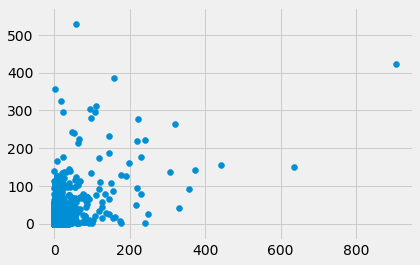

In [7]:
trad_sport_ratio = df.trad_count/(df.sport_count+df.trad_count)
#trad_sport_ratio = trad_sport_ratio[trad_sport_ratio <= 1]
print(trad_sport_ratio.mean())
plt.scatter(df.trad_count,df.sport_count)#trad_sport_ratio,df.success)
plt.axis('equal');

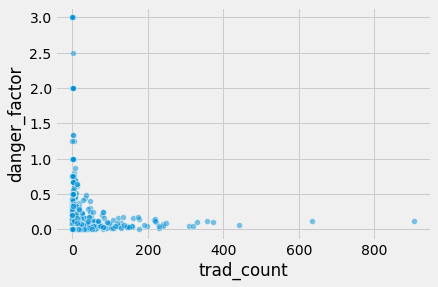

In [8]:
sb.scatterplot('trad_count','danger_factor',alpha=.5,data=df);
#sb.scatterplot('sport_count','danger_factor',alpha=.5,data=df);

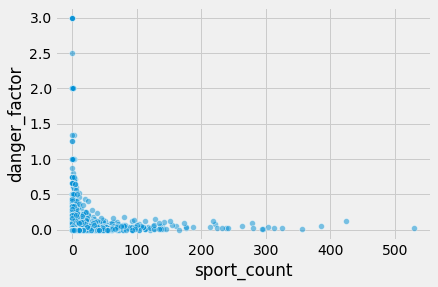

In [9]:
sb.scatterplot('sport_count','danger_factor',alpha=.5,data=df);

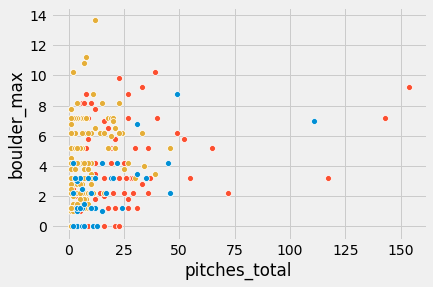

In [75]:
only_trad = df[(df.sport_count == 0) & (df.trad_count > 0)]
only_sport = df[(df.trad_count == 0) & (df.sport_count > 0)]
only_boulder = df[(df.trad_count == 0) & (df.sport_count == 0)]

sb.scatterplot(x='pitches_total',y='boulder_max',data=only_sport,color='C1')
sb.scatterplot(x='pitches_total',y='boulder_max',data=only_boulder,color='C2')
sb.scatterplot(x='pitches_total',y='boulder_max',data=only_trad,color='C0');
# plt.axhline(y = only_boulder.boulder_max.mean(),lw=2,color='C2')
# plt.axhline(y = only_sport.boulder_max.mean(),lw=2,color='C1')
# plt.axhline(y = only_trad.boulder_max.mean(),lw=2,color='C0');

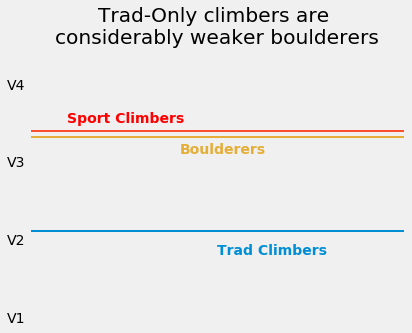

In [101]:
# plt.axhline(y = only_trad.boulder_max.mean(),lw=2,color='C0')
# plt.axhline(y = only_sport.boulder_max.mean(),lw=2,color='C1')
# plt.axhline(y = only_boulder.boulder_max.mean(),lw=2,color='C2')
plt.axhline(y = only_trad.boulder_max.mean(),lw=2,color='C0')
plt.axhline(y = only_sport.boulder_max.mean(),lw=2,color='C1')
plt.axhline(y = only_boulder.boulder_max.mean(),lw=2,color='C2')
plt.text(0.4,3.1,'Boulderers',color='C2',fontweight='bold')
plt.text(0.5,1.8,'Trad Climbers',color='C0',fontweight='bold')
plt.text(0.1,3.5,'Sport Climbers',color='red',fontweight='bold')
plt.title("Trad-Only climbers are \nconsiderably weaker boulderers",pad=40)#,fontweight = 'bold');
plt.yticks([1,2,3,4],['V1','V2','V3','V4'])
plt.xticks([])
plt.grid(False)
plt.ylim(1,4);

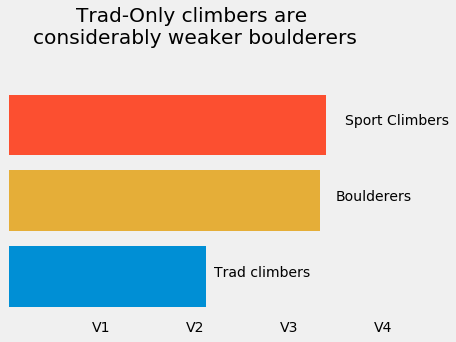

In [121]:
trad_boulder_avg = only_trad.boulder_max.mean()
sport_boulder_avg = only_sport.boulder_max.mean()
boulderer_boulder_avg = only_boulder.boulder_max.mean()
plt.barh([1,2,3],[trad_boulder_avg,boulderer_boulder_avg,sport_boulder_avg],color=['C0','C2','C1'])#,width=.3)
plt.title("Trad-Only climbers are \nconsiderably weaker boulderers",pad=40)#,fontweight = 'bold');
plt.xticks([1,2,3,4],['V1','V2','V3','V4'])
plt.yticks([])
plt.text(2.2,1,'Trad climbers')
plt.text(3.5,2,'Boulderers')
plt.text(3.6,3,'Sport Climbers')
plt.grid(False);

Regarldess of style: Bouldering or Route climbing, the average peak climbs when population is controlled is boulderers, trad climbers, then sport climbers

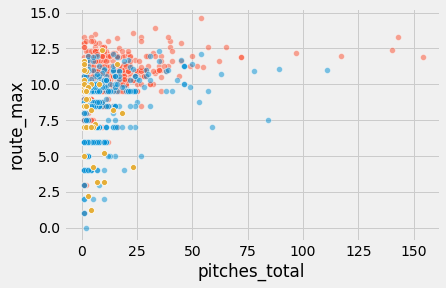

In [76]:
sb.scatterplot(x='pitches_total',y='route_max',data=only_sport,color='C1',alpha=.5)
sb.scatterplot(x='pitches_total',y='route_max',data=only_trad,color='C0',alpha=.5)
sb.scatterplot(x='pitches_total',y='route_max',data=only_boulder,color='C2');

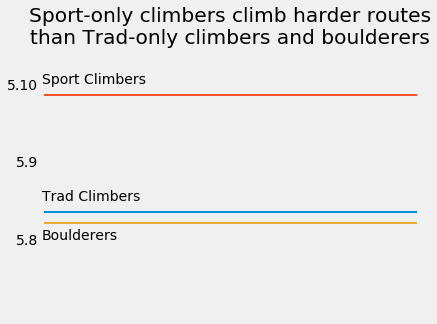

In [77]:
plt.axhline(y = only_trad.route_max.mean(),lw=2,color='C0')
plt.axhline(y = only_sport.route_max.mean(),lw=2,color='C1')
plt.axhline(y = only_boulder.route_max.mean(),lw=2,color='C2')
plt.ylim(7,10)
plt.text(0,8,'Boulderers')
plt.text(0,8.5,'Trad Climbers')
plt.text(0,10,'Sport Climbers')
plt.title('Sport-only climbers climb harder routes\nthan Trad-only climbers and boulderers',pad=40)
plt.grid(False)
plt.xticks([])
plt.yticks([8,9,10],['5.8','5.9','5.10']);

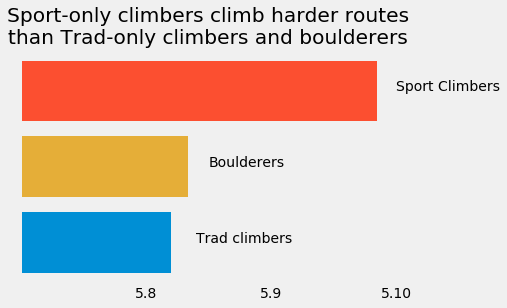

In [132]:
trad_route_avg = only_trad.route_max.mean()
sport_route_avg = only_sport.route_max.mean()
boulderer_route_avg = only_boulder.route_max.mean()
plt.barh([1,2,3],[boulderer_route_avg,trad_route_avg,sport_route_avg],color=['C0','C2','C1'])#,width=.3)
plt.title('Sport-only climbers climb harder routes\nthan Trad-only climbers and boulderers')#,pad=40)#,fontweight = 'bold');
plt.xticks([8,9,10],['5.8','5.9','5.10'])
plt.yticks([])
plt.xlim(7,10)
plt.text(8.4,1,'Trad climbers')
plt.text(8.5,2,'Boulderers')
plt.text(10,3,'Sport Climbers')
plt.grid(False);

In [54]:
only_sport_route_count = only_sport.climbs_total.sum()/only_sport.shape[0]
only_trad_route_count = only_trad.climbs_total.sum()/only_trad.shape[0]
only_boulder_route_count = only_boulder.climbs_total.sum()/only_boulder.shape[0]

print(only_sport_route_count,only_trad_route_count,only_boulder_route_count)

# only_trad = df[(df.sport_count == 0) & (df.trad_count > 0)]
# only_sport = df[(df.trad_count == 0) & (df.sport_count > 0)]
# only_boulder = df[(df.trad_count == 0) & (df.sport_count == 0)]

7.213908450704225 4.706018518518518 5.686832740213523


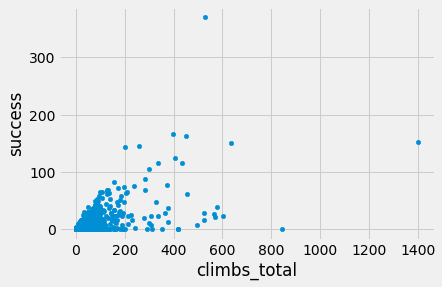

In [87]:
df.plot.scatter('climbs_total','success');

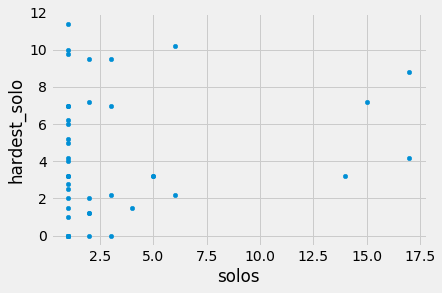

In [80]:
only_sport.plot.scatter('solos','hardest_solo')

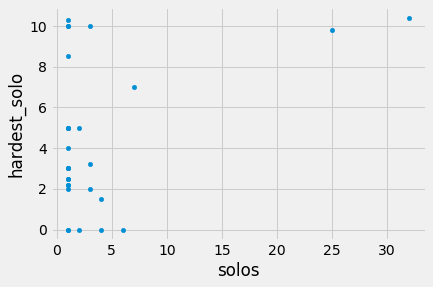

In [81]:
only_trad.plot.scatter('solos','hardest_solo')

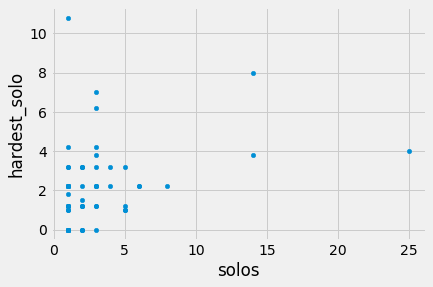

In [82]:
only_boulder.plot.scatter('solos','hardest_solo')

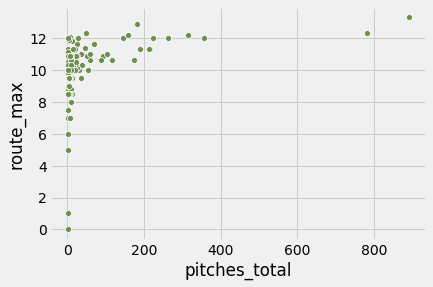

In [67]:
well_rounded = df[(df.sport_count/df.trad_count >= .9) &(df.sport_count/df.trad_count <= 1.1)]
sb.scatterplot(x='pitches_total',y='route_max',data=well_rounded,color='C3');


In [0]:
sport_heavy = df[(df.sport_count/df.trad_count >= 10 )]
sb.scatterplot(x='pitches_total',y='route_max',data=sport_heavy,color='C3');

In [0]:
trad_heavy = df[(df.sport_count/df.trad_count <= .1 )]
sb.scatterplot(x='pitches_total',y='route_max',data=trad_heavy,color='C3');

In [0]:
plt.style.use('fivethirtyeight')
#sb.pairplot(df)

g = sb.PairGrid(df)
g = g.map(plt.scatter)

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
  xlabel = ax.xaxis.get_label_text()
  xlabels.append(xlabel)
for ax in g.axes[:,0]:
  ylabel = ax.yaxis.get_label_text()
  ylabels.append(ylabel)

for i in range(len(xlabels)):
  for j in range(len(ylabels)):
    g.axes[j,i].xaxis.set_label_text(xlabels[i])
    g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()